# Part1: Split data into training, validation and test set manually

Codes below are used to split Expedia data into training, validation and test set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from scipy.stats import skew
from sklearn.model_selection import train_test_split


In [4]:
train = pd.read_csv('../expedia_data/train.csv')

FileNotFoundError: File b'test.csv' does not exist

In [5]:
test = pd.read_csv('../expedia_data/test.csv')

In [3]:
print('training data has %d records'%len(train))
print('test data has %d records'%len(test))

training data has 9917530 records
test data has 6622629 records


In [4]:
cols_train_only = [col for col in train.columns.unique().tolist() if col not in test.columns.unique().tolist()]
print('Columns only available in training data:',cols_train_only)

Columns only available in training data: ['position', 'click_bool', 'gross_bookings_usd', 'booking_bool']


In [5]:
train = train.drop(columns = cols_train_only)
train.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [15]:
# combine train and test data
all_data = pd.concat([train, test], ignore_index=True)
all_data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [16]:
print('Whole dataset has %d records' % len(all_data))

Whole dataset has 16540159 records


In [17]:
all_data['date_time'] = pd.to_datetime(all_data.date_time)
all_data.sort_values(by=['date_time'],inplace=True)

In [18]:
all_data = all_data.reset_index(drop=True)
all_data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,24202,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,327,4,4.5,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,20797,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,53733,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,57269,4,4.5,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For manually splitting dataset, I first split whole dataset into training(0.8) and test set(0.2), then within training set I further split it into training set(0.8) and validation set (0.2). 

In [19]:
# Approach1: split data manually
training_data = all_data[0: 10585701]
validation_data = all_data[10585701:13232127]
test_data = all_data[13232127:16540160]

In [20]:
print('training set has %d records'%len(training_data))
print('validation set has %d records'%len(validation_data))
print('test set has %d records'%len(test_data))

training set has 10585701 records
validation set has 2646426 records
test set has 3308032 records


In [48]:
## output to csv files:
# training_data.to_csv('training_set_manually.csv',encoding = 'utf-8',index = False)
# validation_data.to_csv('validation_set_manually.csv',encoding = 'utf-8',index = False)
# test_data.to_csv('test_set_manually.csv',encoding = 'utf-8',index = False)

In [21]:
training_data.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv

reference: https://stats.stackexchange.com/questions/101066/split-train-validation-test-sets-by-time-is-it-correct

In [20]:
# Approach2: timeseries split
from sklearn.model_selection import TimeSeriesSplit

features = [col for col in all_data_.columns.unique().tolist() if col != 'price_usd']
target = ['price_usd']

X = all_data_[features]
y = all_data_[target]

tscv = TimeSeriesSplit(n_splits=5)

In [21]:
for train_index, test_index in tscv.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # TODO: build model
    # TODO: evaluate accuracy

TRAIN: [      0       1       2 ... 2756691 2756692 2756693] TEST: [2756694 2756695 2756696 ... 5513384 5513385 5513386]
TRAIN: [      0       1       2 ... 5513384 5513385 5513386] TEST: [5513387 5513388 5513389 ... 8270077 8270078 8270079]
TRAIN: [      0       1       2 ... 8270077 8270078 8270079] TEST: [ 8270080  8270081  8270082 ... 11026770 11026771 11026772]
TRAIN: [       0        1        2 ... 11026770 11026771 11026772] TEST: [11026773 11026774 11026775 ... 13783463 13783464 13783465]
TRAIN: [       0        1        2 ... 13783463 13783464 13783465] TEST: [13783466 13783467 13783468 ... 16540156 16540157 16540158]


In [22]:
X_train.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
5443591,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,24202,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5443595,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,51017,3,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5443589,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,327,4,4.5,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5443590,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,20797,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5443597,365278,2012-11-01 00:01:37,24,216,NaN,NaN,225,53733,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
y_train.head()

,price_usd
5443591,93.07
5443595,94.53
5443589,142.71
5443590,79.22
5443597,74.20


In [23]:
# random sample training dataset (5000 records)
train_small = X_train.sample(5000, replace=True)
train_small = train_small.reset_index().drop(columns = ['index'])  #reset_index for clean view
train_small.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,495198,2013-03-27 08:46:52,5,219,NaN,NaN,219,123355,4,4.5,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,4.0
1,214657,2013-04-20 21:16:48,14,100,NaN,NaN,219,105478,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,395553,2012-12-22 08:52:47,24,129,NaN,NaN,129,139499,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,462885,2013-01-16 07:13:49,5,219,NaN,NaN,219,96974,4,4.0,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,275136,2012-12-09 11:24:31,32,220,NaN,NaN,219,99894,4,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#X_nondate_train = X_train.drop('date_time', axis=1, inplace=True)
#X_train.head()
# X_new = SelectKBest(chi2, k=4).fit_transform(X_train, y_train)
# X_new.shape()

X_train = X_train.fillna(X_train.mean())
X_train = X_train.replace(np.inf,0)
X_train = X_train.replace(-np.inf,0)
X_train.head()


,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
5443591,365278,24,216,3.367407,174.542732,225,24202,3,0.0,0,...,26.626051,0.130722,0.077082,21.45046,0.15068,0.078277,20.610086,-0.061118,0.00952,22.973731
5443595,365278,24,216,3.367407,174.542732,225,51017,3,2.0,0,...,26.626051,0.130722,0.077082,21.45046,0.15068,0.078277,20.610086,-0.061118,0.00952,22.973731
5443589,365278,24,216,3.367407,174.542732,225,327,4,4.5,0,...,7.000000,0.130722,0.077082,21.45046,0.15068,0.078277,20.610086,-0.061118,0.00952,22.973731
5443590,365278,24,216,3.367407,174.542732,225,20797,3,3.0,0,...,26.626051,0.130722,0.077082,21.45046,0.15068,0.078277,20.610086,-0.061118,0.00952,22.973731
5443597,365278,24,216,3.367407,174.542732,225,53733,3,3.0,0,...,26.626051,0.130722,0.077082,21.45046,0.15068,0.078277,20.610086,-0.061118,0.00952,22.973731


In [39]:
#X_train.drop('comp8_rate', axis=1, inplace=True) # drop the negative value column
X_train.head()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_inv,comp8_rate_percent_diff
5443591,365278,24,216,3.367407,174.542732,225,24202,3,0.0,0,...,1.000000,26.626051,0.130722,0.077082,21.45046,0.15068,0.078277,20.610086,0.00952,22.973731
5443595,365278,24,216,3.367407,174.542732,225,51017,3,2.0,0,...,0.054298,26.626051,0.130722,0.077082,21.45046,0.15068,0.078277,20.610086,0.00952,22.973731
5443589,365278,24,216,3.367407,174.542732,225,327,4,4.5,0,...,0.000000,7.000000,0.130722,0.077082,21.45046,0.15068,0.078277,20.610086,0.00952,22.973731
5443590,365278,24,216,3.367407,174.542732,225,20797,3,3.0,0,...,0.000000,26.626051,0.130722,0.077082,21.45046,0.15068,0.078277,20.610086,0.00952,22.973731
5443597,365278,24,216,3.367407,174.542732,225,53733,3,3.0,0,...,0.000000,26.626051,0.130722,0.077082,21.45046,0.15068,0.078277,20.610086,0.00952,22.973731


In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/Users/jingwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [43]:
from sklearn.svm import LinearSVC

from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_train)
X_new.shape

/Users/jingwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [45]:
# creating matrices for sklearn:
# handle object columns:

remove_feats = ['price_usd','date_time','srch_id','site_id','visitor_location_country_id','prop_country_id','prop_id','prop_brand_bool','srch_destination_id','srch_saturday_night_bool','random_bool','click_bool','booking_bool', 'random_bool','click_bool','booking_bool']

X_train_1 = X_train[[col for col in X_train.columns.unique().tolist() if col not in remove_feats ]]
X_test_1 = X_test[[col for col in X_test.columns.unique().tolist() if col not in remove_feats ]]




In [46]:
# TODO: check na and inf values
print(np.any(np.isnan(X_train_1)))
print(np.all(np.isfinite(X_train_1)))

print(np.any(np.isnan(X_test_1)))
print(np.all(np.isfinite(X_test_1)))  # 有infinite values

print(np.any(np.isnan(y)))
print(np.all(np.isfinite(y)))  

False
True
True
False
False
True


In [49]:
# Lasso
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train_1.values, y_train.values)

/Users/jingwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingwang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [50]:
coef = pd.Series(model_lasso.coef_, index = X_train_1.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 22 variables and eliminated the other 16 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

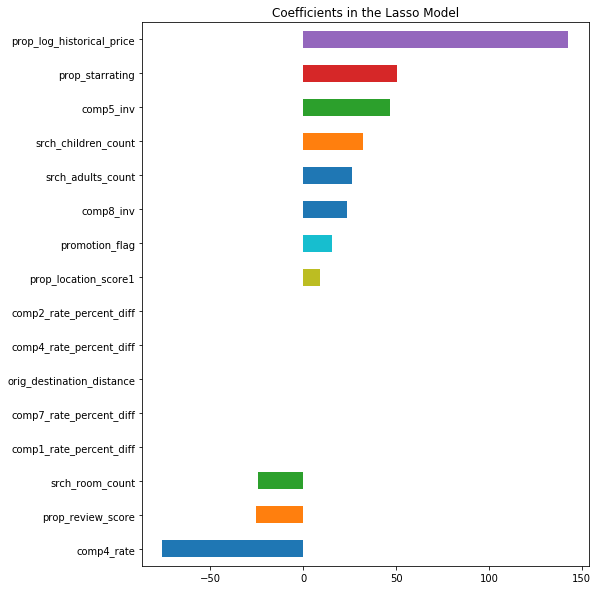

In [53]:
imp_coef = pd.concat([coef.sort_values().head(8),
                     coef.sort_values().tail(8)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [54]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train_1), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

ValueError: Shape of passed values is (2, 1), indices imply (2, 13783466)